## CAPSTONE PROJECT - REGRESSION

### IMPORT PACKAGES

In [ ]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

### LOAD DATASET

In [ ]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. 
# Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = "/content/gdrive/MyDrive/Capstone Project DS/2. Regression - Housing Rental Prices/"

In [ ]:
os.listdir(path)

['Housing_Rental_Prices_train.csv',
 'Housing_Rental_Prices_test.csv',
 'Housing_Rental_Prices_train.xlsx']

In [ ]:
data_train = pd.read_csv(path + 'Housing_Rental_Prices_train.csv', usecols=['bedroom', 'bathrooms','area','floor_number', 'deposit_amt','rent' ])

In [ ]:
data_train.head()

,bedroom,bathrooms,area,floor_number,deposit_amt,rent
0,2,2,1050.0,5,3,20000.0
1,2,2,760.0,5,40000,14000.0
2,3,3,0.0,1,60000,22999.0
3,1,1,628.0,3,40000,13000.0
4,2,2,668.0,6,20,7500.0


### PROBLEM STATEMENT

Pada studi kasus Capstone Linear Regression menggunakan data dengan variabel dependen (Y) yaitu rent dan variabel independen (X) yaitu bedroom, bathrooms, area, floor_number_gate_community, lightbill, maintenance_amt, dan deposit_amt.


Variabel dependen (Y) = rent

Variabel independen (X) = bedroom, bathrooms, area, floor_number_gate_community, lightbill, maintenance_amt, dan deposit_amt

1. Menentukan pengaruh variabel X terhadap Variabel Y
2. Analisa dan Prediksi harga sewa rumah

### EDA

Summary Data Train

In [ ]:
#informasi terkait data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedroom       10884 non-null  int64  
 1   bathrooms     10884 non-null  int64  
 2   area          10884 non-null  float64
 3   floor_number  10884 non-null  int64  
 4   deposit_amt   10884 non-null  int64  
 5   rent          10884 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 510.3 KB


In [ ]:
#analisa deskriptif data
data_train.describe()

,bedroom,bathrooms,area,floor_number,deposit_amt,rent
count,10884.000000,10884.000000,10884.000000,10884.000000,1.088400e+04,1.088400e+04
mean,1.797868,1.779677,528.558560,3.062018,3.670939e+04,2.855947e+04
std,0.807328,0.832231,930.460935,2.390430,5.589578e+04,1.183249e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,4.000000e+00,1.050000e+04
50%,2.000000,2.000000,510.000000,3.000000,3.000000e+04,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,5.000000e+04,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,1.500000e+06,1.234568e+08


Data Cleansing

In [ ]:
# Check missing value
data_train.isna().sum()

bedroom         0
bathrooms       0
area            0
floor_number    0
deposit_amt     0
rent            0
dtype: int64

Berdasarkan output diatas, tidak terdapat data yang kosong

In [ ]:
#  Check duplicated data
duplicate = data_train[data_train.duplicated(keep=False)]
duplicate

,bedroom,bathrooms,area,floor_number,deposit_amt,rent
5,2,2,950.0,1,50000,17000.0
10,2,2,0.0,3,50000,17000.0
11,2,2,1000.0,2,50000,20000.0
13,2,2,0.0,2,50000,17000.0
14,1,1,0.0,0,20000,6000.0
...,...,...,...,...,...,...
10863,2,2,0.0,1,3,27000.0
10865,1,1,0.0,0,20000,6000.0
10867,1,1,0.0,2,25000,7000.0
10874,1,1,0.0,2,25000,12000.0


In [ ]:
# Drop Duplicate Data
data_train.drop_duplicates(inplace=True)

In [ ]:
# Cek ukuran data apakah duplicate sudah terhapus
data_train.shape

(9234, 6)

In [ ]:
data_train.head(10)

,bedroom,bathrooms,area,floor_number,deposit_amt,rent
0,2,2,1050.0,5,3,20000.0
1,2,2,760.0,5,40000,14000.0
2,3,3,0.0,1,60000,22999.0
3,1,1,628.0,3,40000,13000.0
4,2,2,668.0,6,20,7500.0
5,2,2,950.0,1,50000,17000.0
6,3,3,1530.0,2,3,28000.0
7,2,2,900.0,1,36000,18000.0
8,3,3,0.0,7,200000,35000.0
9,3,3,1400.0,2,60000,25999.0


Setelah dilakukan pengecekan data yang duplikat dilakukan drop sehingga data yang tersisa berjumlah 9647 dari 10083

Melakukan pengecekan zero values pada colum Area

In [ ]:
(data_train['area'] == 0).sum()

2754

Ditemukan sebanyak 2754 rows memiliki zero values, lalu dilakukan drop rows

In [ ]:
data_train= data_train[data_train['area'] != 0]

In [ ]:
(data_train['area'] == 0).sum()

0

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 10883
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedroom       6480 non-null   int64  
 1   bathrooms     6480 non-null   int64  
 2   area          6480 non-null   float64
 3   floor_number  6480 non-null   int64  
 4   deposit_amt   6480 non-null   int64  
 5   rent          6480 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 354.4 KB


Setelah dilakukan drop rows yang memiliki zero values pada data column Area, rows yang tersisa sebanyak 6480 data

In [ ]:
data_train.head()

,bedroom,bathrooms,area,floor_number,deposit_amt,rent
0,2,2,1050.0,5,3,20000.0
1,2,2,760.0,5,40000,14000.0
3,1,1,628.0,3,40000,13000.0
4,2,2,668.0,6,20,7500.0
5,2,2,950.0,1,50000,17000.0


Cek tipe data

In [ ]:
# Cek kembali data information
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 10883
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedroom       6480 non-null   int64  
 1   bathrooms     6480 non-null   int64  
 2   area          6480 non-null   float64
 3   floor_number  6480 non-null   int64  
 4   deposit_amt   6480 non-null   int64  
 5   rent          6480 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 354.4 KB


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 10883
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedroom       6480 non-null   int64  
 1   bathrooms     6480 non-null   int64  
 2   area          6480 non-null   float64
 3   floor_number  6480 non-null   int64  
 4   deposit_amt   6480 non-null   int64  
 5   rent          6480 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 354.4 KB


Tipe data  variabel sudah sesuai.

In [ ]:
data_train.head()

,bedroom,bathrooms,area,floor_number,deposit_amt,rent
0,2,2,1050.0,5,3,20000.0
1,2,2,760.0,5,40000,14000.0
3,1,1,628.0,3,40000,13000.0
4,2,2,668.0,6,20,7500.0
5,2,2,950.0,1,50000,17000.0


# Mencari Insight Data

In [ ]:
#Another insight (Jumlah kamar yang disediakan berbagai tipe rumah)
data_train_bedroomPerEachHouse = data_train['bedroom'].value_counts()
data_train_bedroomPerEachHouse

2     3036
1     2395
3      926
4      113
5        9
20       1
Name: bedroom, dtype: int64

In [ ]:
# Memfilter top 4 penawaran jumlah kamar tidur tiap rumah
popular_sumBedroomPerEachHouse = data_train_bedroomPerEachHouse.iloc[0:4]
popular_sumBedroomPerEachHouse

2    3036
1    2395
3     926
4     113
Name: bedroom, dtype: int64

Text(0.5, 1.0, 'Distribution of the Number of Bedrooms per Each House')

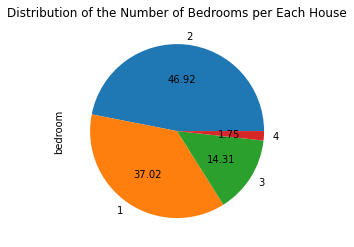

In [ ]:
piechart_Bedroom=popular_sumBedroomPerEachHouse.plot(kind='pie',autopct='%.2f')
piechart_Bedroom.set_title("Distribution of the Number of Bedrooms per Each House")

In [ ]:
#Another insight (Jumlah kamar mandi yang disediakan berbagai tipe rumah)
data_train_BathroomsEachHouse = data_train['bathrooms'].value_counts()
data_train_BathroomsEachHouse

2     3142
1     2411
3      770
4      113
5       33
6        8
7        2
20       1
Name: bathrooms, dtype: int64

In [ ]:
# Memfilter top 4 penawaran jumlah kamar mandi tiap rumah
popular_sumBathroomsPerEachHouse = data_train_BathroomsEachHouse.iloc[0:4]
popular_sumBathroomsPerEachHouse

2    3142
1    2411
3     770
4     113
Name: bathrooms, dtype: int64

Text(0.5, 1.0, 'Distribution of the Number of Bathrooms per Each House')

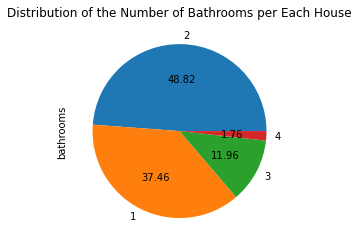

In [ ]:
piechart_Bathrooms=popular_sumBathroomsPerEachHouse.plot(kind='pie',autopct='%.2f')
piechart_Bathrooms.set_title("Distribution of the Number of Bathrooms per Each House")

Berdasarkan 2 data diatas, dapat diketahui bahwa kebanyakan rumah menawarkan jumlah kamar mandi atau kamar tidur sebanyak 2 unit

In [ ]:
comparison_column = np.where(data_train["bedroom"] == data_train["bathrooms"], True, False)
comparison_column

array([ True,  True,  True, ..., False,  True,  True])

In [ ]:
true_count = sum(comparison_column)
true_count

5709

Selain itu, berdasarkan data perbandingan values pada kolom bedroom dan bathroom memiliki jumlah nilai yang sama sebanyak 5709 dari 6480
Persentase jumlah kamar tidur dan kamar mandi tiap rumah adalah sama sebanyak 88.1%

In [ ]:
data_train['rent'].describe()

count     6480.000000
mean     17473.421746
std       9989.289134
min       2000.000000
25%      11000.000000
50%      15000.000000
75%      21000.000000
max      95000.000000
Name: rent, dtype: float64

In [ ]:
#Another insight (Letak Rumah dalam gedung)
data_train_floornumberBuilding = data_train['floor_number'].value_counts()
data_train_floornumberBuilding

1    1480
2    1022
3     937
4     702
5     630
0     462
6     441
7     351
9     231
8     224
Name: floor_number, dtype: int64

Text(0, 0.5, 'frequency')

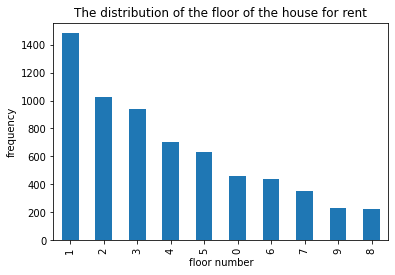

In [ ]:
#Insight (Mencari letak rumah yang ingin disewa dalam sebuah gedung)
data_train_floornumberBuilding.plot(kind='bar')
plt.title('The distribution of the floor of the house for rent')
plt.xlabel('floor number')
plt.ylabel('frequency')

Berdasarkan gambar Histogram diatas, kebanyak rumah yang ditawari berada pada lantai ke-1.

### DATA PRE-PROCESSING

Uji Normalitas

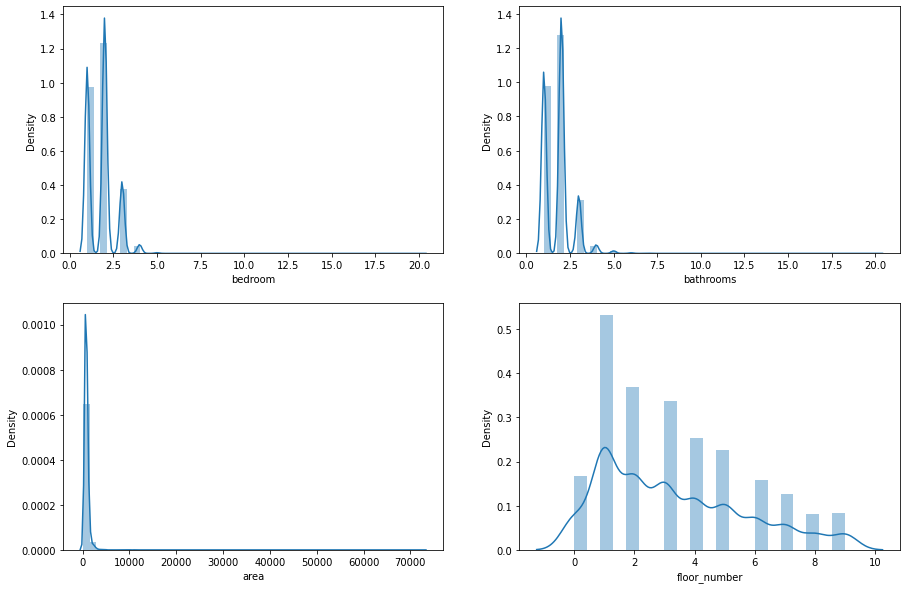

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(data_train["bedroom"], ax=axes[0, 0])
sns.distplot(data_train["bathrooms"], ax=axes[0, 1])
sns.distplot(data_train["area"], ax=axes[1, 0])
sns.distplot(data_train["floor_number"], ax=axes[1, 1])
plt.show()

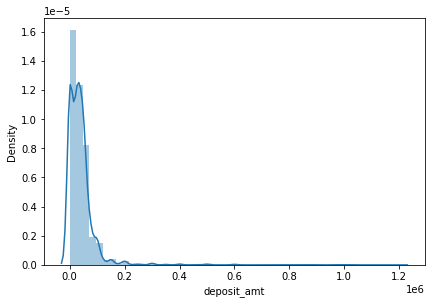

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
plt.subplot(222)
sns.distplot(data_train["deposit_amt"])
plt.show()

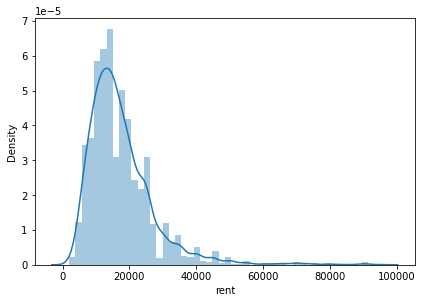

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
plt.subplot(222)
sns.distplot(data_train["rent"])
plt.show()

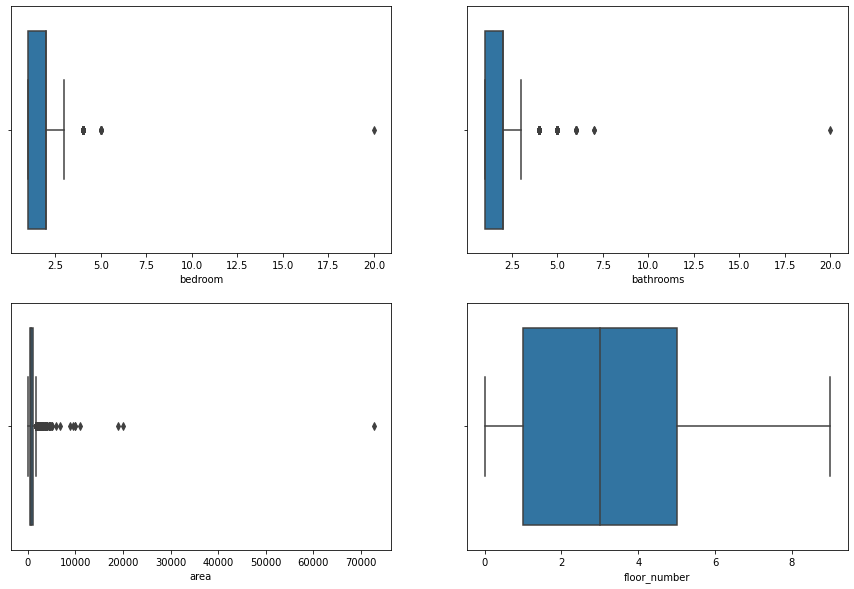

In [ ]:
# Cek normalitas data dengan boxplot
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data_train["bedroom"], ax=axes[0, 0])
sns.boxplot(data_train["bathrooms"], ax=axes[0, 1])
sns.boxplot(data_train["area"], ax=axes[1, 0])
sns.boxplot(data_train["floor_number"], ax=axes[1, 1])
plt.show()

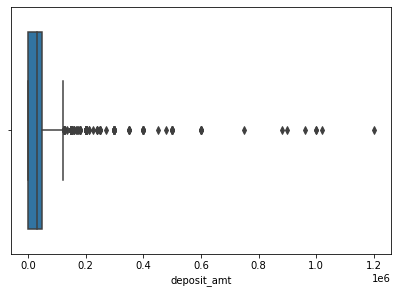

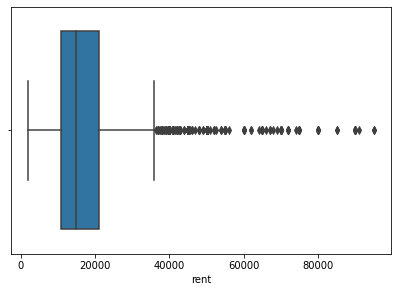

In [ ]:
# Cek normalitas data dengan boxplot
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
plt.subplot(222)
sns.boxplot(data_train["deposit_amt"])
plt.show()

# Cek normalitas data dengan boxplot
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
plt.subplot(222)
sns.boxplot(data_train["rent"])
plt.show()

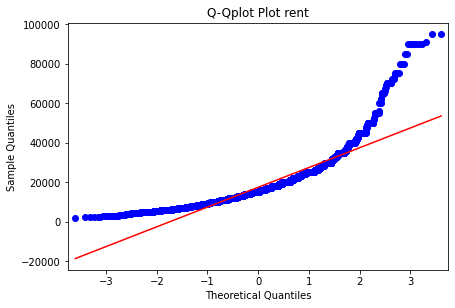

In [ ]:
# Cek normalitas data dengan Q-Q plot

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(data_train["rent"].dropna(), line='s', ax=ax)
top = ax.get_ylim()[1] * 0.75
plt.title('Q-Qplot Plot rent')

plt.show()

> Insight Grafik:
*   Histogram : histogram kedua variabel berbentuk lonceng walaupun tidak simetris dan sedikit positive skewness (kemiringan condong ke kiri), dapat mengindikasi terdapat ourlier pada variabel Aroma.
*   Boxplot : terdapat outliers/pencilan pada variabel Aroma tetapi tidak jauh dalam range.
*   Q-Q Plot : titik-titik biru mengikuti garis merah sehingga mengindikasi data mengikuti distribusi normal.

Oleh karena pengecekan normalitas data secara visual tidak dapat ditarik kesimpulan sehingga perlu dilakukan pengujian hipotesis berikut:
<br>
<br>
Ho: Data berdistribusi Normal <br>
H1: Data tidak berdistribusi Normal
<br>
<br>
Bila p-value kurang dari 0.05 maka Ho Ditolak, berarti Data tidak berdistribusi Normal
Bila p-value lebih dari 0.05 maka Ho Diterima, berarti Data berdistribusi Normal.
<br>
<br>
Salah satu Uji Distribusi Normalitas Data yaitu Uji Shapiro-Wilk.

In [ ]:
# Uji Shapiro-Wilk
from scipy.stats import shapiro
stat_y, pval_y = shapiro(data_train["rent"])

print(format(pval_y,".3f"))

0.000


Berdasarkan hasil pvalue_y diatas, diketahui bahwa Variabel Dependen tidak berdistribusi normal

Uji Linearitas

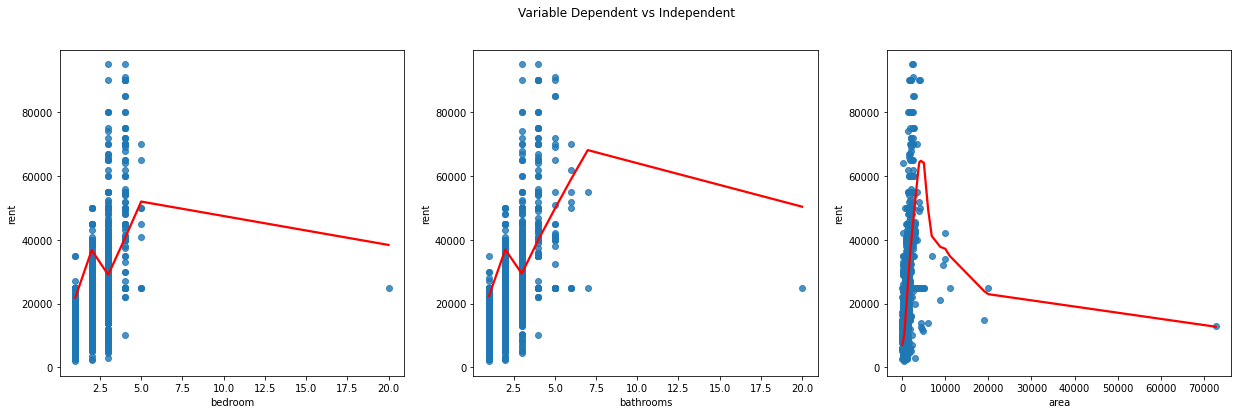

In [ ]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=data_train["bedroom"], y=data_train["rent"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=data_train["bathrooms"], y=data_train["rent"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=data_train["area"], y=data_train["rent"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

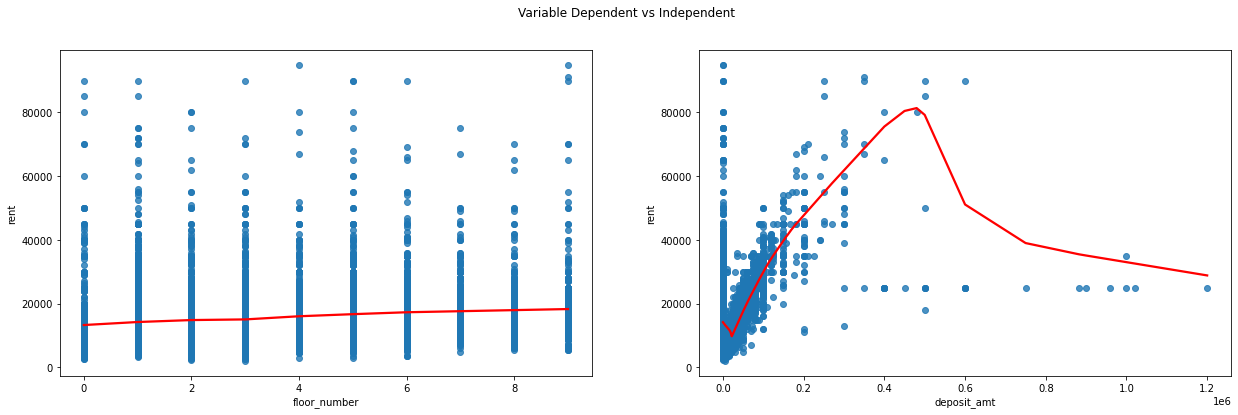

In [ ]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 2, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=data_train["floor_number"], y=data_train["rent"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=data_train["deposit_amt"], y=data_train["rent"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
plt.show()

Uji Multikolineritas

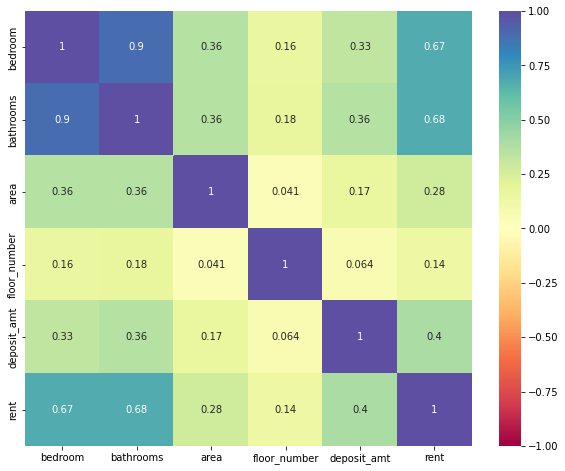

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data_train.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = data_train.corr()["rent"].sort_values()
korelasi

floor_number    0.136715
area            0.278805
deposit_amt     0.399759
bedroom         0.673670
bathrooms       0.676880
rent            1.000000
Name: rent, dtype: float64

Berdasarkan uji multikolinearitas diatas, dapat diketahui bahwa model regresi mengalami masalah multikolinearitas.

In [ ]:
data_trainNew=data_train.drop(['bathrooms'], axis = 1)

Lakukan drop salah satu column yang memiliki nilai korelasi yang sama sehingga asumsi terpenuhi

In [ ]:
data_trainNew.head()

,bedroom,area,floor_number,deposit_amt,rent
0,2,1050.0,5,3,20000.0
1,2,760.0,5,40000,14000.0
3,1,628.0,3,40000,13000.0
4,2,668.0,6,20,7500.0
5,2,950.0,1,50000,17000.0


### FEATURE ENGINEERING

### Scaling
Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [ ]:
# Scale data
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(data_trainNew)
scaled_data_train

array([[ 0.23659891,  0.1864719 ,  0.71601872, -0.66981001,  0.25294825],
       [ 0.23659891, -0.08158515,  0.71601872,  0.02613277, -0.34774144],
       [-1.04316817, -0.20359733, -0.11750348,  0.02613277, -0.44785639],
       ...,
       [ 1.516366  ,  1.42508032,  2.38306311,  2.46211519,  3.75697146],
       [ 0.23659891, -0.26367908, -0.53426457, -0.66981001, -0.34774144],
       [-1.04316817, -0.32191216, -0.53426457, -0.66986221,  0.5532931 ]])

In [ ]:
# Membuat dataframe dari hasil scalling
scaled_data_train = pd.DataFrame(scaled_data_train, columns=data_trainNew.columns)
scaled_data_train

,bedroom,area,floor_number,deposit_amt,rent
0,0.236599,0.186472,0.716019,-0.669810,0.252948
1,0.236599,-0.081585,0.716019,0.026133,-0.347741
2,-1.043168,-0.203597,-0.117503,0.026133,-0.447856
3,0.236599,-0.166624,1.132780,-0.669514,-0.998489
4,0.236599,0.094038,-0.951026,0.200132,-0.047397
...,...,...,...,...,...
6475,0.236599,0.047822,-1.367787,0.113132,-0.247626
6476,0.236599,-0.090828,-1.367787,-0.147866,-0.247626
6477,1.516366,1.425080,2.383063,2.462115,3.756971
6478,0.236599,-0.263679,-0.534265,-0.669810,-0.347741


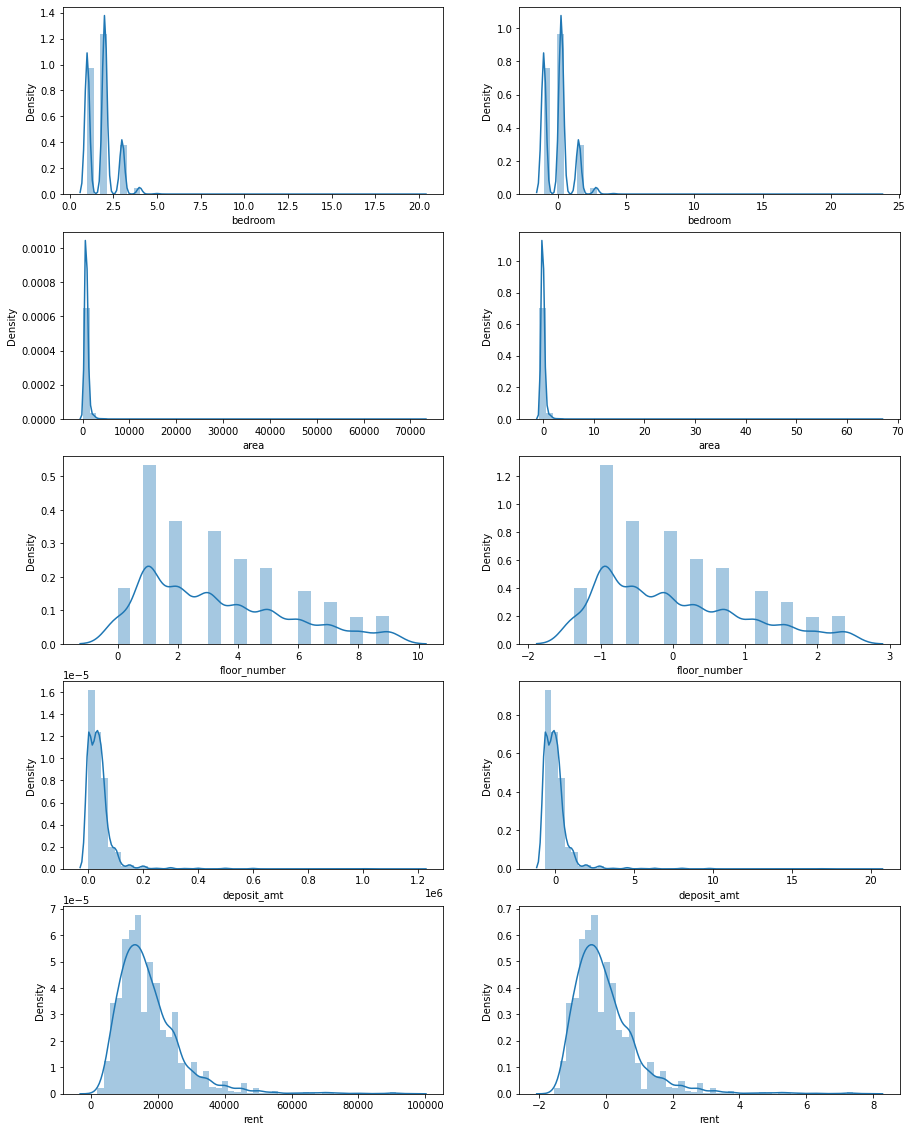

In [ ]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.distplot(data_trainNew["bedroom"], ax=axes[0, 0])
sns.distplot(scaled_data_train["bedroom"], ax=axes[0, 1])
sns.distplot(data_trainNew["area"], ax=axes[1, 0])
sns.distplot(scaled_data_train["area"], ax=axes[1, 1])
sns.distplot(data_trainNew["floor_number"], ax=axes[2, 0])
sns.distplot(scaled_data_train["floor_number"], ax=axes[2, 1])
sns.distplot(data_trainNew["deposit_amt"], ax=axes[3, 0])
sns.distplot(scaled_data_train["deposit_amt"], ax=axes[3, 1])
sns.distplot(data_trainNew["rent"], ax=axes[4, 0])
sns.distplot(scaled_data_train["rent"], ax=axes[4, 1])
plt.show()

## MODELING

In [ ]:
X_train = scaled_data_train.drop("rent", axis=1).values
y_train = scaled_data_train["rent"].values.reshape(-1,1)

In [ ]:
print("Ukuran X train ", len(X_train))
print("Ukuran y train ", len(y_train))

Ukuran X train  6480
Ukuran y train  6480


### Membangun model dengan package Statsmodels

In [ ]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [ ]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [ ]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1553.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:50:48   Log-Likelihood:                -7015.4
No. Observations:                6480   AIC:                         1.404e+04
Df Residuals:                    6475   BIC:                         1.407e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.522e-16      0.009   1.71e-14      1.0

Dari output diatas, kita dapat melihat nilai - nilai :

Nilai p>|t| = 0,000; 0,001; 0,003 ; 0,000. Nilai p>|t| kurang dari 0,05 dimiliki oleh variabel x1,x2,x3, dan x4 artinya, bahwa keempat variabel independen memberikan pengaruh secara signifikan terhadap variabel dependen, Selain itu, Nilai p>|t| intercept sebesar 1.00, yang berarti intercept berpengaruh signifikan terhadap model.

Nilai coef-X1 0.5932 artinya besarnya pengaruh variabel independen bedroom 0.5932 poin, pada kasus kali ini, jika nilai  bedroom bertambah satu, maka nilai sale price bertambah 0.5932

Nilai coef-X2 0.0308 artinya besarnya pengaruh variabel independen bathrooms 0.0308 poin, pada kasus kali ini, jika nilai  bathrooms bertambah satu, maka nilai sale price bertambah 0.0308

Nilai coef-X3 0.0265 artinya besarnya pengaruh variabel independen area 0.0265 poin, pada kasus kali ini, jika nilai  area bertambah satu, maka nilai sale price bertambah 0.0265

Nilai coef-X4 0.1947 artinya besarnya pengaruh variabel independen floor_number 0.1947 poin, pada kasus kali ini, jika nilai  floor_number bertambah satu, maka nilai sale price bertambah 0.1947


Nilai R-squared 0.490, artinya variabel dependen rent dapat dijelaskan oleh kelima variabel independen sebesar 50.8% , makin besar nilai R-squared akan semakin bagus.

Nilai AIC 1.404e+04 dan BIC 1.407e+04, nilai ini dapat digunakan ketika dalam analisis regresi menghasilkan beberapa model, dan dijadikan acuan untuk memilih model mana yang terbaik dengan melihat nilai AIC dan BIC yang terkecil.

In [ ]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.4896309395247026
adjusted coefficient of determination: 0.4893156536186175
regression coefficients: [1.52221985e-16 5.93163486e-01 3.08455305e-02 2.64531323e-02
 1.94662133e-01]


### Load Data Test

In [ ]:
data_test = pd.read_csv(path + 'Housing_Rental_Prices_train.csv', usecols=['bedroom','area','floor_number', 'deposit_amt','rent' ])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedroom       10884 non-null  int64  
 1   area          10884 non-null  float64
 2   floor_number  10884 non-null  int64  
 3   deposit_amt   10884 non-null  int64  
 4   rent          10884 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 425.3 KB


In [ ]:
# Check missing value
data_test.isna().sum()

bedroom         0
area            0
floor_number    0
deposit_amt     0
rent            0
dtype: int64

In [ ]:
#  Check duplicated data
duplicate = data_test[data_test.duplicated(keep=False)]
duplicate

,bedroom,area,floor_number,deposit_amt,rent
5,2,950.0,1,50000,17000.0
10,2,0.0,3,50000,17000.0
11,2,1000.0,2,50000,20000.0
13,2,0.0,2,50000,17000.0
14,1,0.0,0,20000,6000.0
...,...,...,...,...,...
10865,1,0.0,0,20000,6000.0
10867,1,0.0,2,25000,7000.0
10870,2,0.0,1,20000,13000.0
10874,1,0.0,2,25000,12000.0


In [ ]:
# Drop Duplicate Data
data_test.drop_duplicates(inplace=True)

In [ ]:
data_test.shape

(9020, 5)

In [ ]:
# Scale data
scaler = StandardScaler()
scaled_data_test= scaler.fit_transform(data_test)
scaled_data_test

array([[ 0.17707164,  0.4479992 ,  0.71669055, -0.64226335, -0.00887338],
       [ 0.17707164,  0.15624684,  0.71669055,  0.02222957, -0.01348987],
       [ 1.37886715, -0.60834554, -0.92729159,  0.35450094, -0.0065659 ],
       ...,
       [ 1.37886715,  1.79609629,  2.36067269,  2.34812921,  0.01805616],
       [ 0.17707164, -0.04194355, -0.51629605, -0.64226335, -0.01348987],
       [-1.02472386, -0.10532424, -0.51629605, -0.64231319, -0.00656513]])

In [ ]:
# Membuat dataframe dari hasil scalling
scaled_data_test = pd.DataFrame(scaled_data_test, columns=data_test.columns)
scaled_data_test

,bedroom,area,floor_number,deposit_amt,rent
0,0.177072,0.447999,0.716691,-0.642263,-0.008873
1,0.177072,0.156247,0.716691,0.022230,-0.013490
2,1.378867,-0.608346,-0.927292,0.354501,-0.006566
3,-1.024724,0.023449,-0.105301,0.022230,-0.014259
4,0.177072,0.063691,1.127686,-0.641981,-0.018491
...,...,...,...,...,...
9015,0.177072,0.146186,-1.338287,-0.143906,-0.012720
9016,0.177072,-0.608346,0.305695,-0.276815,-0.015798
9017,1.378867,1.796096,2.360673,2.348129,0.018056
9018,0.177072,-0.041944,-0.516296,-0.642263,-0.013490


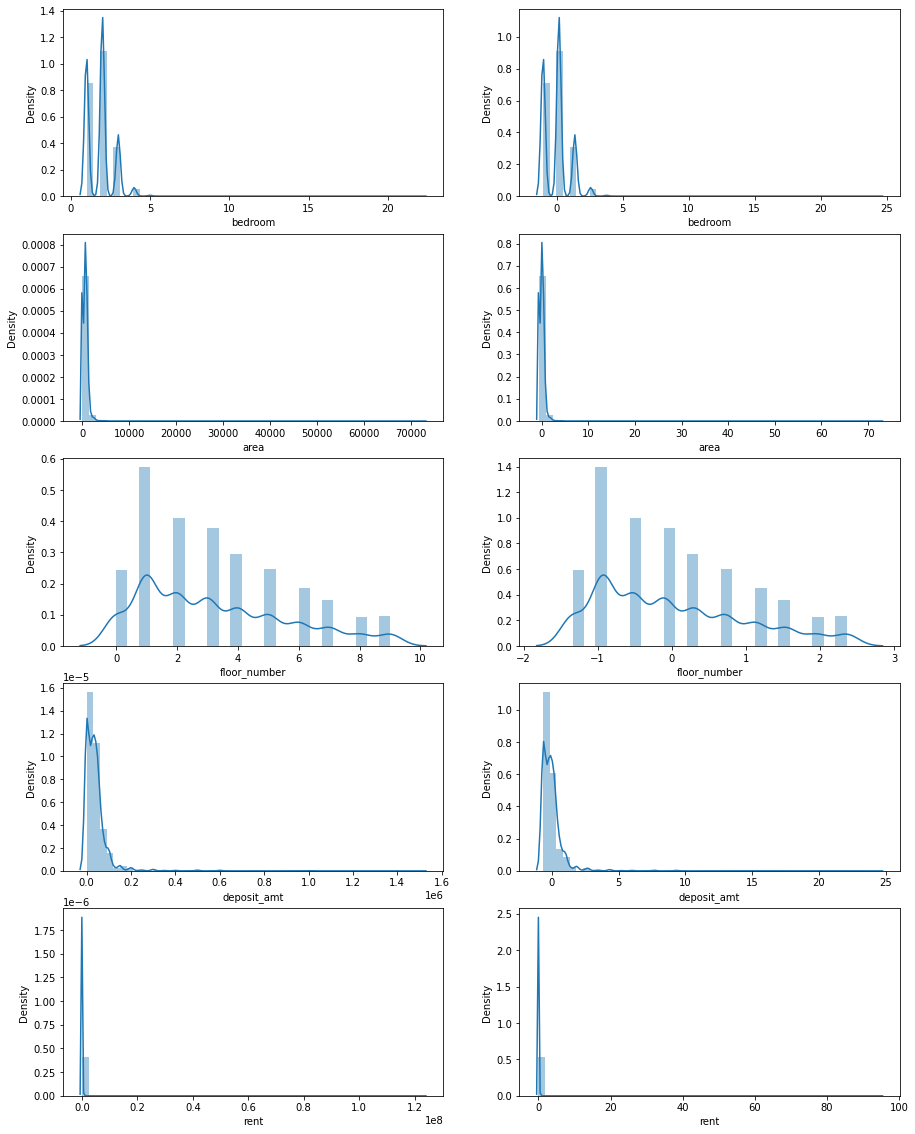

In [ ]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.distplot(data_test["bedroom"], ax=axes[0, 0])
sns.distplot(scaled_data_test["bedroom"], ax=axes[0, 1])
sns.distplot(data_test["area"], ax=axes[1, 0])
sns.distplot(scaled_data_test["area"], ax=axes[1, 1])
sns.distplot(data_test["floor_number"], ax=axes[2, 0])
sns.distplot(scaled_data_test["floor_number"], ax=axes[2, 1])
sns.distplot(data_test["deposit_amt"], ax=axes[3, 0])
sns.distplot(scaled_data_test["deposit_amt"], ax=axes[3, 1])
sns.distplot(data_test["rent"], ax=axes[4, 0])
sns.distplot(scaled_data_test["rent"], ax=axes[4, 1])

plt.show()

In [ ]:
X_test = scaled_data_test.drop("rent", axis=1).values
y_test = scaled_data_test["rent"].values.reshape(-1,1)

In [ ]:
# membuat list
list_columns = []

for i in data_trainNew.columns:
  if i != "rent":
    list_columns.append(i)

In [ ]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,bedroom,area,floor_number,deposit_amt,actual_price,prediction_price
0,0.177072,0.447999,0.716691,-0.642263,-0.008873,0.012786
1,0.177072,0.156247,0.716691,0.022230,-0.013490,0.133138
2,1.378867,-0.608346,-0.927292,0.354501,-0.006566,0.843607
3,-1.024724,0.023449,-0.105301,0.022230,-0.014259,-0.605564
4,0.177072,0.063691,1.127686,-0.641981,-0.018491,0.011858


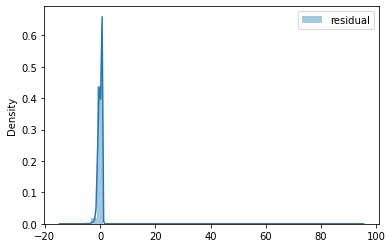

In [ ]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, sehingga dapat disimpulkan residual berdistribusi normal 

In [ ]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,bedroom,area,floor_number,deposit_amt,actual_price,prediction_price,residual
0,0.177072,0.447999,0.716691,-0.642263,-0.008873,0.012786,-0.021659
1,0.177072,0.156247,0.716691,0.022230,-0.013490,0.133138,-0.146628
2,1.378867,-0.608346,-0.927292,0.354501,-0.006566,0.843607,-0.850173
3,-1.024724,0.023449,-0.105301,0.022230,-0.014259,-0.605564,0.591304
4,0.177072,0.063691,1.127686,-0.641981,-0.018491,0.011858,-0.030350


Plot data actual dan prediction <br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut : 

<function matplotlib.pyplot.show>

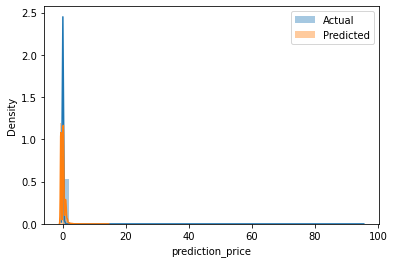

In [ ]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

Asumsi No autokorelasi

In [ ]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.0303946555516523

Skor Durbin antara 1.5 dan 2.5 sehingga dapat disimpulkan tidak autokorelasi dan asumsi puas.

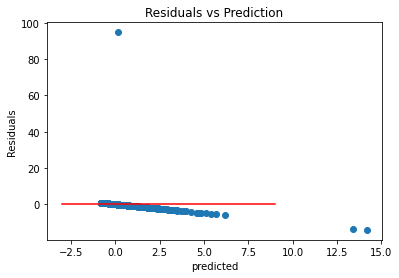

In [ ]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot([-3,9],[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

Dari grafik yang dihasilkan diatas, terlihat data berkumpul dalam satu pusat, sehingga dapat dikatakan homoskedasitas terpenuhi.

### EVALUATION

In [ ]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 1.4679133111894562


### LOAD AND PREDICT NEW DATA

In [ ]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)

T-test score const:  1.7145695159469387e-14
T-test score X1:  58.81294436162156
T-test score X2:  3.2344215339560147
T-test score X3:  2.9390644979869713
T-test score X4:  20.634667390904486


In [ ]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)

P-value const:  0.9999999999999863
P-value X1:  0.0
P-value X2:  0.0012250124071815167
P-value X3:  0.0033036733687551393
P-value X4:  1.1326767169759386e-91


Diperoleh dari output diatas, bahwa P-value keempat variabel kurang dari 0,05 sehingga Hypothesis null ditolak dan dapat disimpulkan, bahwa keempat variabel independen (X) memberikan pengaruh secara signifikan pada variabel dependen Rent (Y).

In [ ]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  1552.9743958567701
P-value :  0.0
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null ditolak dan dapat disimpulkan bahwa model regresi dari keempat variabel independen dan variabel dependen Rent (Y) layak digunakan.

### KESIMPULAN/SARAN

Berdasarkan data train yang telah diload diambil 5 column data yaitu bedroom, bathrooms, area, floor_number, dan deposit_amt.

Pada pengujian multikolinearitas, didapatkan bahwa nilai bedroom dan bathrooms memiliki korelasi yang sama sehingga dapat disimpulkan bahwa kedua column memiliki values yang sama sehingga menyebabkan model regresi memiliki masalah multikolinearitas. Hal ini juga telah ditampilkan bahwa persentase kemiripan data bedroom dan bathrooms sebesar 88.1%. Agar dapat membuat model yang layak digunakan, dilakukan drop salah satu column yaitu bathrooms karena memiliki korelasi yang besar.

Lalu dilakukan pengujian P-value didapatkan bahwa keempat variabel mempengaruhi variabel Rent (Y)  secara signifikan.

Didapatkan pula, nilai p-value < 0.05 sehingga H0 ditolak dapat disimpulkan model regresi dari keempat variabel independen dan variabel dependen rent layak digunakan.